# <big><font color='#D35400'>**VISUALIZACION DE DATOS DE PRODUCCION**</font><big>
##  INDEX
####  1.[CARGA DE DATOS](#carga)
####  2.[PANDAS](#pandas)
####  2.[VISUALIZACION DE DATOS - SEABORN](#sns)  

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

<a id='carga'></a>
# <font color='#8E44AD'>CARGA DE DATOS</font></big></big>

## <font color='#2F60EB'>REVISAMOS TODOS LOS ARCHIVOS .csv EN LA CARPETA</font>

In [3]:
path=input("Escriba el PATH completo de la carpeta que contiene los .CSV y presione ENTER. Ejemplo: D:\Pablo\Python\working_files")

clear_output(wait=True)
# D:\Pablo\Python\working_files
for file in os.listdir(path):
    if file.endswith(".csv"):
        print(os.path.join(file))

listado-de-pozos-cargados-por-empresas-operadoras.csv
produccin-de-pozos-de-gas-y-petrleo-2018.csv
produccin-de-pozos-de-gas-y-petrleo-2019.csv
produccin-de-pozos-de-gas-y-petrleo-2020.csv
produccin-de-pozos-de-gas-y-petrleo-2021.csv


## <font color='#2F60EB'>ELEGIMOS LOS .csv CON LOS QUE VAMOS A TRABAJAR</font>


In [5]:
if 'csv_file_list' in locals():
    del csv_file_list

csv_file_list = []   

pozo_nomb_comienzo=input("Escriba las primeras letras/numeros de los Pozos con los que va a trabajar y presione ENTER,si va a utilizar todos los .CSV de la carpeta, solo presione ENTER")

clear_output(wait=True)

for file in os.listdir(path):
    if file.endswith('.csv') and file.startswith((pozo_nomb_comienzo.lower(),pozo_nomb_comienzo.upper(),pozo_nomb_comienzo.capitalize())):
        csv_file_list.append(path+"\\"+file)
csv_file_list

['D:\\Pablo\\Python\\working_files\\produccin-de-pozos-de-gas-y-petrleo-2020.csv',
 'D:\\Pablo\\Python\\working_files\\produccin-de-pozos-de-gas-y-petrleo-2021.csv']

<a id='pandas'></a>
# <font color='#8E44AD'>PANDAS</font></big></big>

## <font color='#2F60EB'>CREAMOS 1 DATAFRAME PANDA CON LOS ARCHIVOS .csv ELEGIDOS</font>
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe


In [7]:
df = pd.concat(map(pd.read_csv, csv_file_list)) # 
df = df.reindex(sorted(df.columns), axis=1)     # Ordenamos las columnas alfabéticamente
pd.set_option('display.max_columns', 200)       # Muestra las primeras 200 columnas
df

,anio,areapermisoconcesion,areayacimiento,clasificacion,cuenca,empresa,fecha_data,fechaingreso,formacion,formprod,habilitado,idareapermisoconcesion,idareayacimiento,idempresa,idpozo,idusuario,iny_agua,iny_co2,iny_gas,iny_otro,mes,observaciones,prod_agua,prod_gas,prod_pet,profundidad,provincia,proyecto,rectificado,sigla,sub_tipo_recurso,subclasificacion,tef,tipo_de_recurso,tipoestado,tipoextraccion,tipopozo,vida_util
0,2020,FLOR DE ROCA,FLOR DE ROCA,EXPLOTACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2020-01-31,2020-02-16 17:53:49.208731,punta rosada,PROS,t,Z047,FDRO,Z001,145603,379,0.000,0.0,0.0,0.0,1,NaN,2.9165,0.0,5.030,1947.0,Rio Negro,Sin Proyecto,f,PDC.AN.x-1,NaN,DESARROLLO,0.0,CONVENCIONAL,Extracción Efectiva,Bombeo Mecánico,Petrolífero,NaN
1,2020,FLOR DE ROCA,FLOR DE ROCA,EXPLORACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2020-01-31,2020-02-16 18:08:17.399088,punta rosada,PROS,t,Z047,FDRO,Z001,145614,379,0.000,0.0,0.0,0.0,1,Cargado automáticamente como [Sin movimientos],0.0000,0.0,0.000,2058.0,Rio Negro,Sin Proyecto,f,JG.FDR.x-1,NaN,EXPLORACION,0.0,CONVENCIONAL,En Reserva para Recup. Sec./Asist.,Bombeo Mecánico,Otro tipo,0.0
2,2020,FLOR DE ROCA,FLOR DE ROCA,SERVICIO,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2020-01-31,2020-02-16 18:00:07.329116,punta rosada,PROS,t,Z047,FDRO,Z001,32171,379,1846.425,0.0,0.0,0.0,1,NaN,0.0000,0.0,0.000,1919.5,Rio Negro,Sin Proyecto,f,PDC.RG.x-1,NaN,INYECTOR DE AGUA,31.0,CONVENCIONAL,En Inyección Efectiva,Bombeo Mecánico,Inyección de Agua,NaN
3,2020,FLOR DE ROCA,FLOR DE ROCA,SERVICIO,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2020-01-31,2020-02-16 18:08:17.399088,punta rosada,PROS,t,Z047,FDRO,Z001,145615,379,0.000,0.0,0.0,0.0,1,Cargado automáticamente como [Sin movimientos],0.0000,0.0,0.000,2034.0,Rio Negro,Sin Proyecto,f,JG.FDRW.x-1,NaN,SUMIDERO,0.0,CONVENCIONAL,Abandono Temporario,Bombeo Mecánico,Sumidero,0.0
4,2020,FLOR DE ROCA,FLOR DE ROCA,EXPLOTACION,NEUQUINA,PETROLERA DEL COMAHUE S.A.,2020-01-31,2020-02-16 18:01:59.33725,punta rosada,PROS,t,Z047,FDRO,Z001,145604,379,0.000,0.0,0.0,0.0,1,NaN,1845.1155,0.0,8.682,2179.0,Rio Negro,Sin Proyecto,f,YPF.GR.x-6,NaN,DESARROLLO,31.0,CONVENCIONAL,Extracción Efectiva,Bombeo Mecánico,Petrolífero,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960662,2021,CATRIEL OESTE,CATRIEL OESTE,NaN,NEUQUINA,Petrolera Aconcagua Energia S.A.,2021-12-31,2022-01-16 17:33:54.253791,quintuco,QTUC,t,CAP,CAP,ACO,7733,459,0.000,0.0,0.0,0.0,12,NaN,0.0000,0.0,0.000,970.0,Rio Negro,Sin Proyecto,f,YPF.RN.CO-170,NaN,NaN,0.0,CONVENCIONAL,En Reserva para Recup. Sec./Asist.,Sin Sistema de Extracción,Petrolífero,NaN
960663,2021,CATRIEL OESTE,CATRIEL OESTE,NaN,NEUQUINA,Petrolera Aconcagua Energia S.A.,2021-12-31,2022-01-16 17:33:54.253791,quintuco,QTUC,t,CAP,CAP,ACO,7695,459,0.000,0.0,0.0,0.0,12,NaN,0.0000,0.0,0.000,904.0,Rio Negro,Sin Proyecto,f,YPF.RN.CO-87,NaN,NaN,0.0,CONVENCIONAL,Parado Transitoriamente,Sin Sistema de Extracción,Inyección de Agua,NaN
960664,2021,CHAÑARES HERRADOS,CHAÑARES HERRADOS,NaN,CUYANA,Petrolera Aconcagua Energia S.A.,2021-12-31,2022-01-16 17:35:19.717424,formación improductiva,FIMP,t,CHA,CHA,ACO,611,459,0.000,0.0,0.0,0.0,12,NaN,0.0000,0.0,0.000,4778.0,Mendoza,Sin Proyecto,f,CHE.Md.CHOx-1,NaN,NaN,0.0,CONVENCIONAL,Abandonado,Sin Sistema de Extracción,Petrolífero,NaN
960665,2021,CATRIEL OESTE,CATRIEL OESTE,NaN,NEUQUINA,Petrolera Aconcagua Energia S.A.,2021-12-31,2022-01-16 17:33:54.253791,quintuco,QTUC,t,CAP,CAP,ACO,7625,459,0.000,0.0,0.0,0.0,12,NaN,0.0000,0.0,0.000,1007.0,Rio Negro,Sin Proyecto,f,YPF.RN.CO-7,NaN,NaN,0.0,CONVENCIONAL,En Estudio,Sin Sistema de Extracción,Petrolífero,NaN


## <font color='#2F60EB'>VER INDEX, NOMBRE y TIPO DE CADA COLUMNA</font>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914005 entries, 0 to 960666
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   anio                    int64  
 1   areapermisoconcesion    object 
 2   areayacimiento          object 
 3   clasificacion           object 
 4   cuenca                  object 
 5   empresa                 object 
 6   fecha_data              object 
 7   fechaingreso            object 
 8   formacion               object 
 9   formprod                object 
 10  habilitado              object 
 11  idareapermisoconcesion  object 
 12  idareayacimiento        object 
 13  idempresa               object 
 14  idpozo                  int64  
 15  idusuario               int64  
 16  iny_agua                float64
 17  iny_co2                 float64
 18  iny_gas                 float64
 19  iny_otro                float64
 20  mes                     int64  
 21  observaciones           object 


## <font color='#2F60EB'>VER ESTADISTICAS DE LAS COLUMNAS NUMERICAS</font>

In [10]:
df.describe()

,anio,idpozo,idusuario,iny_agua,iny_co2,iny_gas,iny_otro,mes,prod_agua,prod_gas,prod_pet,profundidad,tef,vida_util
count,953338.0,953338.000000,953338.000000,953338.000000,953338.0,953338.000000,953338.000000,953338.000000,953338.000000,953338.000000,953338.000000,953338.000000,953338.000000,42777.000000
mean,2020.0,99200.918714,369.681226,364.925495,0.0,0.115340,1.059175,6.503403,358.082775,47.306118,29.935168,1608.950205,10.762368,0.107441
std,0.0,41814.303340,46.453142,2042.223862,0.0,19.233484,230.984885,3.452432,1221.533295,792.439116,156.752205,1670.574876,14.181817,6.413992
min,2020.0,212.000000,334.000000,-2.000000,0.0,0.000000,0.000000,1.000000,-1.360000,-12.267000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,68826.000000,334.000000,0.000000,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1006.000000,0.000000,0.000000
50%,2020.0,108174.000000,345.000000,0.000000,0.0,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1550.000000,0.000000,0.000000
75%,2020.0,129752.000000,411.000000,0.000000,0.0,0.000000,0.000000,10.000000,24.542507,0.000000,14.320000,2300.000000,29.810000,0.000000
max,2020.0,162089.000000,471.000000,159971.250000,0.0,6775.290000,74310.400000,12.000000,204924.000000,101788.700000,10919.795000,378939.000000,31.000000,383.000000


## <font color='#2F60EB'>VER COLUMNAS CON VALORES NULOS (nan) Y EL PORCENTAJE DE LOS VALORES NULOS DE CADA UNA</font>
https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

In [18]:
print ('COLUMNA','\t','PORCENTAJE nan(%)','\n')
print (df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0])

COLUMNA 	 PORCENTAJE nan(%) 

clasificacion       24.649152
cuenca               0.003762
formacion            3.533481
formprod             3.390587
observaciones       92.695212
sub_tipo_recurso    96.542172
subclasificacion    24.649152
tipoestado           0.003866
tipoextraccion       0.003866
tipopozo             0.003866
vida_util           95.722529
dtype: float64


## <font color='#2F60EB'>Obtener los valores por fila sin repetirlos, ordenados alfabeticamente (*unique()* + *sorted* + *notnull*()), y contarlos (*count* + *enumerate*)</font>

In [10]:
col = 'cuenca'

for count, curve in enumerate(df[col].unique()):
    (count)
print(f"Cantidad de valores diferentes (sin contar los valores nulos): {count}","\n")

for uniq in sorted(df[df[col].notnull()][col].unique()):
    print (uniq)

Cantidad de valores diferentes (sin contar los valores nulos): 8 

AUSTRAL
CAÑADON ASFALTO
CUYANA
GOLFO SAN JORGE
NEUQUINA
NORESTE
NOROESTE
ÑIRIHUAU


## <font color='#2F60EB'>VER DATOS UNICOS DE UNA COLUMNA (OPCION 1)</font>

In [8]:

col = 'tipopozo'

############################################################################

for count, curve in enumerate(df[col].unique()):
    (count)
print (f'Columna: {col}')

print (f"Cantidad de valores diferentes (incluyendo valores nulos si los hubiera): {count+1}")

nan_porc = df[col].isnull().sum() * 100 / df[col].shape[0]
print (f'Porcentaje de valores nulos: '+str("%.3f" % nan_porc)+'%','\n')
print (f'Valores:','\n')

# Codigo para obtener los valor unicos
uniq_list = df[col].unique()

uniq_str = []
for a in uniq_list:
    uniq_str.append(str(a))


# imprimirlos uno por fila
for item in sorted(uniq_str):
    if type(item) == str:
        print (item.title())
    else:
        print (item)

Columna: tipopozo
Cantidad de valores diferentes (incluyendo valores nulos si los hubiera): 11
Porcentaje de valores nulos: 0.004% 

Valores: 

Acuífero
Bidireccional De Almacenamiento
Extractor De Almacenamiento
Gasífero
Inyección De Agua
Inyección De Gas
Monitoreo De Almacenamiento
Otro Tipo
Petrolífero
Sumidero
Nan


## <font color='#2F60EB'>VER DATOS UNICOS DE UNA COLUMNA (OPCION 2)</font>
Hace lo mismo que la anterior, la ventaja de esta celda es que, si lo deseamos, podemos poner los nan primero

In [23]:
col = 'tipopozo'


for count, curve in enumerate(df[col].unique()):
    (count)
print (f'Columna: {col}')

print (f"Cantidad de valores diferentes (incluyendo valores nulos si los hubiera): {count+1}")

nan_porc = df[col].isnull().sum() * 100 / df[col].shape[0]
print (f'Porcentaje de valores nulos: '+str("%.3f" % nan_porc)+'%','\n')
print (f'Valores:','\n')

# Codigo para obtener los valor unicos
uniq_list = df[col].unique()


# Codigo para ordenarlos (alfabeticamente si son STR, por valor si son numeros INT/FLOAT)
ustr = [x for x in uniq_list if type(x) == str]
uint = [x for x in uniq_list if type(x) == int]
ufloat = [x for x in uniq_list if type(x) == float]

ustr = sorted(ustr)
uint = sorted(uint)
ufloat = sorted(ufloat)

uniq = []

uniq.extend(uint)
uniq.extend(ufloat)
uniq.extend(ustr)


# imprimirlos uno por fila
for item in uniq:
    if type(item) == str:
        print (item.title())
    else:
        print (item)

Columna: tipopozo
Cantidad de valores diferentes (incluyendo valores nulos si los hubiera): 11
Porcentaje de valores nulos: 0.004% 

Valores: 

nan
Acuífero
Bidireccional De Almacenamiento
Extractor De Almacenamiento
Gasífero
Inyección De Agua
Inyección De Gas
Monitoreo De Almacenamiento
Otro Tipo
Petrolífero
Sumidero


<a id='sns'></a>
# <font color='#8E44AD'>VISUALIZACION DE DATOS CON SEABORN</font>

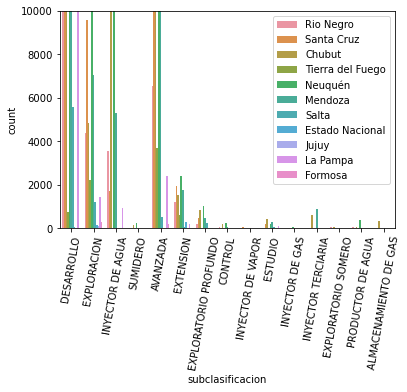

In [12]:
plot=sns.countplot(data=df,x='subclasificacion',hue='provincia')
plt.setp(plot.get_xticklabels(), rotation=80)
plt.legend(loc='upper right')
plt.ylim(0,10000)
plt.show()

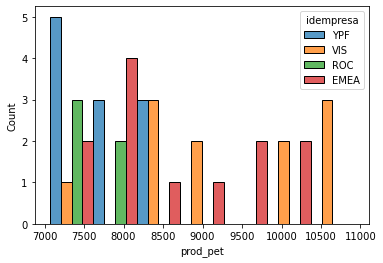

In [16]:
# 1 FILTRO UTILIZANDO LOS NOMBRES DE LAS SERIES ENTRE []

sns.histplot(data=df[df['prod_pet']>7000],x='prod_pet',hue='idempresa',multiple="dodge",shrink=1)
plt.show()

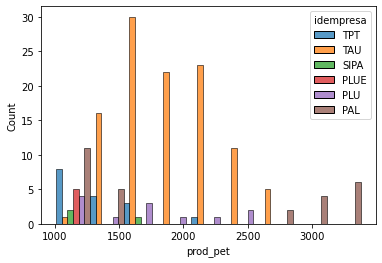

In [29]:
# 2 FILTROS CON .loc ()

sns.histplot(data=df.loc[(df.prod_pet > 1000) & (df.prod_gas >10000)],
             x='prod_pet',hue='idempresa',multiple="dodge",shrink=1)
plt.show()

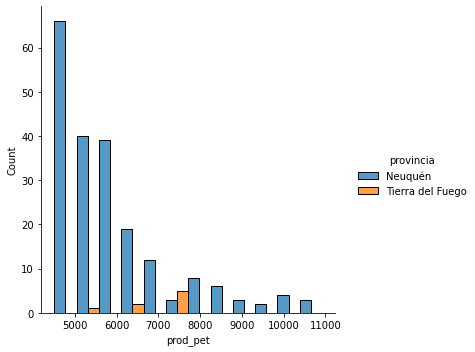

In [39]:
sns.displot(data=df[df['prod_pet']>4500],x='prod_pet',hue='provincia',multiple="dodge")
plt.show()

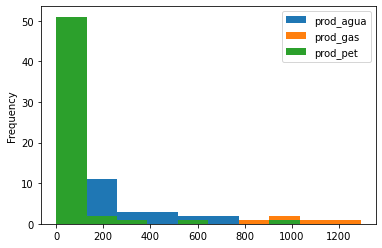

In [45]:
df.groupby('idempresa')['prod_agua','prod_gas','prod_pet'].mean().plot(kind='hist')
plt.show()

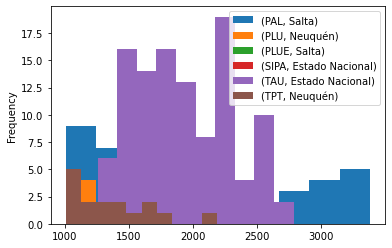

In [48]:
# PLOTEAR UTILIZANDO MAS DE 1 SERIE COMO FILTRO

df.loc[(df.prod_pet > 1000) & (df.prod_gas >10000)].groupby(['idempresa','provincia'])['prod_pet'].plot(kind='hist')
plt.legend()
plt.show()